# Student Loan Risk with Deep Learning

In [28]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [29]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [30]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [31]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [32]:
# Define the target set y using the credit_ranking column
y = loans_df["credit_ranking"]

# Display a sample of y
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: credit_ranking, Length: 1599, dtype: int64

In [33]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns="credit_ranking")

# Review the features DataFrame
X.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [34]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [35]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [36]:
# Define the the number of inputs (features) to the model

inputs = len(X_train.columns)



# Review the number of features
print("Number of features:", inputs)

Number of features: 11


In [37]:
# Define the number of hidden nodes for the first hidden layer

first_layer_nodes = 10
# Define the number of hidden nodes for the second hidden layer
second_layer_nodes = 10

# Define the number of neurons in the output layer
output_nodes = 1

In [38]:
# Create the Sequential model instance

model = tf.keras.models.Sequential()
# Add the first hidden layer
model.add(tf.keras.layers.Dense(units=first_layer_nodes,activation='relu'))

# Add the second hidden layer
model.add(tf.keras.layers.Dense(units=second_layer_nodes,activation='relu'))

# Add the output layer to the model specifying the number of output neurons and activation function
model.add(tf.keras.layers.Dense(units=output_nodes ,activation='relu'))

In [39]:
# Display the Sequential model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [40]:
# Compile the Sequential model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Fit the model using 50 epochs and the training data
fit_model = model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.5563 - loss: 3.4886 
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.5882 - loss: 2.3419
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.6246 - loss: 1.7246
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.6887 - loss: 1.4995
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.6796 - loss: 1.4333
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.7016 - loss: 1.1967
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.7033 - loss: 0.9666
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.7051 - loss: 1.0950
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.7294 - loss: 0.9388
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.6949 - loss: 0.9208
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.6725 - loss: 0.7863
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accurac

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [42]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)


# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - 9ms/step - accuracy: 0.6900 - loss: 0.6171
Loss: 0.6171214580535889, Accuracy: 0.6899999976158142


<Axes: >

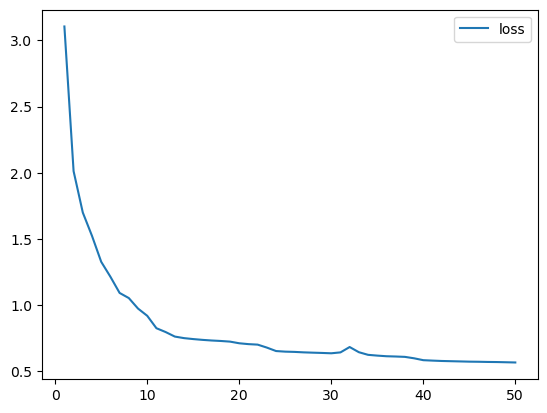

In [43]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")


<Axes: >

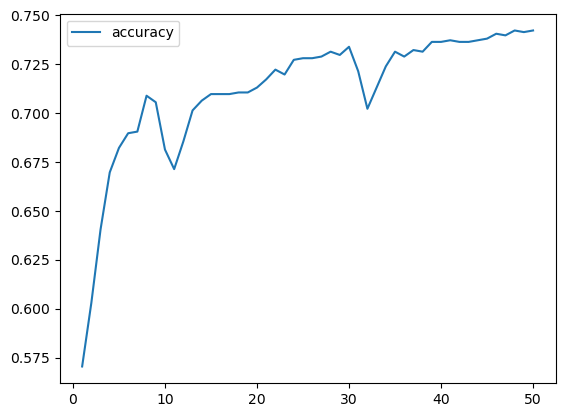

In [44]:
# Plot the accuracy
history_df.plot(y="accuracy")

### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [45]:
# Set the model's file path
file_path = Path("student_loans.keras")

# Export your model to a keras file
model.save(file_path)

---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [46]:
# Set the model's file path
model_path = Path("student_loans.keras")    

# Load the model to a new object
loaded_model=tf.keras.models.load_model(model_path)

### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [47]:
# Make predictions with the test data
predictions = model.predict(X_test_scaled)

# Display a sample of the predictions
predictions[:5]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.7301634 ],
       [0.18809341],
       [0.66612077],
       [0.48808545],
       [1.2140903 ]], dtype=float32)

In [49]:
# Save the predictions to a DataFrame and round the predictions to binary results
predictions_df = pd.DataFrame(predictions, columns=["predictions"])
predictions_df

,predictions
0,0.730163
1,0.188093
2,0.666121
3,0.488085
4,1.214090
...,...
395,0.820810
396,0.500320
397,1.212822
398,0.387599


### Step 4: Display a classification report with the y test data and predictions

In [50]:
# Print the classification report with the y test data and predictions
print(classification_report(y_test, predictions.round()))

              precision    recall  f1-score   support

         0.0       0.64      0.79      0.71       188
         1.0       0.75      0.55      0.63       212
         2.0       0.00      0.00      0.00         0

    accuracy                           0.66       400
   macro avg       0.46      0.45      0.45       400
weighted avg       0.70      0.66      0.67       400



c:\Users\Keegan\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Keegan\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Keegan\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

In order to create a recommendation system for student loans, I would need data such as:
- Payment history
- Location parameter
- STEM degree score
- GPA ranking
- Alumni success
- Study major code
- Time to completion
- Finance workshop score
- Cohort ranking
- Total loan score
- Financial aid score
- Credit ranking

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

This would likely use context based filtering, because the data collected (like GPA, degree score, financial literacy) provides specific attributes of each student, and these wouldn't have an effect on other students (like collaborative filtering). There also isn't likely much content (such as loan history) for many students, so content-based may not work so well here. 

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

- Data Privacy: Handling sensitive personal and financial information requires strict compliance with local laws and regulations, and requires extra care. Ensuring privacy and security is crucial as breaches could lead to significant legal and trust issues.

- Bias: There's a risk of the system developing biases based on the data fed into it, such as favoring certain demographics unintentionally. Ensuring the algorithm is fair and unbiased is crucial to prevent discrimination and to provide equitable loan recommendations.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**

